In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as scp

In [2]:
vehid = pd.read_csv('../data/trajectory/vehid.csv')
vehid = vehid[vehid.columns[1:]]
vehid.head()

,0
0,2387
1,2505
2,3016
3,2420
4,3343


In [3]:
T = pd.read_csv('../data/trajectory/T.csv')
T = T[T.columns[1:]]
T.head()

,0
0,6860.0
1,9187.0
2,8819.0
3,10223.0
4,1187.0


In [4]:
T.shape

(1505756, 1)

In [5]:
dsID = pd.read_csv('../data/trajectory/dsID.csv')
dsID = dsID[dsID.columns[1:]]
dsID.head()

,0
0,5
1,2
2,4
3,6
4,4


In [6]:
dsID.shape # previously it is 1505756

(1505756, 1)

In [7]:
pred_x = pd.read_csv('../data/trajectory/pred_x.csv')


In [8]:
pred_x = pred_x[pred_x.columns[1:]]

In [9]:
pred_x.shape # 5 step predictions, prediction steps

(5, 1505756)

In [10]:
pred_x.head() # vertical, should determine which lane it is

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,0.002054,0.003997,0.000843,0.085620,0.079283,-0.013886,-0.005096,0.078234,0.011854,0.028640,...,0.001937,-0.001996,0.054302,-0.068288,0.018033,-0.125641,0.021321,0.165331,0.021783,0.025261
1,0.007852,0.008454,-0.015426,0.166833,0.092088,-0.028239,0.011468,0.165017,0.011342,0.046908,...,0.043920,0.003256,0.102121,-0.084425,0.029022,-0.219618,0.025479,0.233613,0.031300,0.042829
2,0.052350,-0.022097,-0.041967,0.249628,0.123389,-0.034740,0.021430,0.174726,0.022661,0.076731,...,0.055132,0.017128,0.139757,-0.105671,0.038574,-0.277290,0.021302,0.240936,0.065646,0.045932
3,0.079371,-0.013077,-0.061922,0.297266,0.125948,-0.045059,0.024410,0.204788,0.055031,0.103309,...,0.080531,0.021000,0.153742,-0.146200,0.024354,-0.316535,0.012763,0.163411,0.092354,0.032148
4,0.110575,-0.006379,-0.085172,0.360643,0.180830,-0.059559,0.026636,0.185625,0.067122,0.125046,...,0.093018,0.025432,0.150083,-0.173969,0.030645,-0.361652,0.001665,0.201552,0.105594,0.028042


In [11]:
pred_y = pd.read_csv('../data/trajectory/pred_y.csv')
pred_y = pred_y[pred_y.columns[1:]]
pred_y.shape

(5, 1505756)

In [12]:
pred_y.head()

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,2.921791,4.084619,11.516554,5.504739,5.767026,0.969651,4.773968,7.961786,3.988383,0.980192,...,4.636044,2.907230,5.809168,1.148950,6.968090,3.630425,0.401215,14.595423,2.950727,-0.142090
1,5.720185,8.277920,22.971188,11.049794,11.748712,1.938531,9.527130,16.132008,7.906966,1.877403,...,9.251492,5.736463,11.584943,2.470025,13.929169,7.326207,0.689245,29.066051,5.943503,-0.083663
2,8.381070,12.649888,34.497177,16.604477,17.613033,2.955026,14.256187,24.214172,11.826977,2.809403,...,13.951935,8.429138,17.218360,3.907407,20.848423,11.067134,1.081711,43.485380,9.014593,0.009080
3,10.861565,17.122967,46.002697,22.120617,23.521671,3.953342,18.950912,32.334580,15.683197,3.689013,...,18.669940,10.990357,22.811436,5.462667,27.793640,14.800275,1.501092,57.693680,12.066196,0.073600
4,13.111978,21.505867,57.544470,27.656307,29.377750,4.929189,23.672707,40.479620,19.546440,4.523351,...,23.451004,13.366481,28.316280,7.137704,34.815340,18.648335,1.913153,71.830160,15.163211,0.081853


In [13]:
ts_cen = pd.read_csv('../data/trajectory/ts_cen.csv')
ts_cen = ts_cen[ts_cen.columns[1:]]
ts_cen.shape

(1505756, 16)

In [14]:
ts_cen['dsID'] = dsID

In [15]:
ts_cen_ave = ts_cen.groupby(['dsID']).mean().reset_index(drop = True)
#ts_cen_ave = np.round(ts_cen_ave, 2)
ts_cen_ave

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000669,0.000417,0.000653,0.000517,0.000574,0.000682,0.000834,0.000982,0.001752,0.001671,0.003885,0.005680,0.009274,0.017697,0.045635,0.909078
1,0.000694,0.000355,0.000472,0.000583,0.000673,0.000802,0.000889,0.000946,0.001039,0.001230,0.001577,0.002290,0.004119,0.011270,0.034866,0.938195
2,0.000669,0.000354,0.000519,0.000567,0.000638,0.000766,0.000851,0.000933,0.001103,0.001258,0.001798,0.002641,0.004618,0.011653,0.034640,0.936992
3,0.001043,0.000890,0.001418,0.001084,0.001089,0.001197,0.001376,0.001609,0.002083,0.002501,0.003526,0.005100,0.008501,0.017766,0.051923,0.898894
4,0.000394,0.000449,0.001096,0.000429,0.000410,0.000464,0.000607,0.000750,0.001648,0.001415,0.003940,0.005856,0.009384,0.015499,0.033738,0.923920
5,0.000372,0.000421,0.001238,0.000436,0.000401,0.000434,0.000594,0.000751,0.001926,0.001458,0.004992,0.007313,0.011970,0.019183,0.041321,0.907192


In [16]:
ts_cen_ave = ts_cen.groupby(['dsID']).mean().reset_index(drop = True)
#ts_cen_ave = np.round(ts_cen_ave, 2)
ts_cen_ave

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000669,0.000417,0.000653,0.000517,0.000574,0.000682,0.000834,0.000982,0.001752,0.001671,0.003885,0.005680,0.009274,0.017697,0.045635,0.909078
1,0.000694,0.000355,0.000472,0.000583,0.000673,0.000802,0.000889,0.000946,0.001039,0.001230,0.001577,0.002290,0.004119,0.011270,0.034866,0.938195
2,0.000669,0.000354,0.000519,0.000567,0.000638,0.000766,0.000851,0.000933,0.001103,0.001258,0.001798,0.002641,0.004618,0.011653,0.034640,0.936992
3,0.001043,0.000890,0.001418,0.001084,0.001089,0.001197,0.001376,0.001609,0.002083,0.002501,0.003526,0.005100,0.008501,0.017766,0.051923,0.898894
4,0.000394,0.000449,0.001096,0.000429,0.000410,0.000464,0.000607,0.000750,0.001648,0.001415,0.003940,0.005856,0.009384,0.015499,0.033738,0.923920
5,0.000372,0.000421,0.001238,0.000436,0.000401,0.000434,0.000594,0.000751,0.001926,0.001458,0.004992,0.007313,0.011970,0.019183,0.041321,0.907192


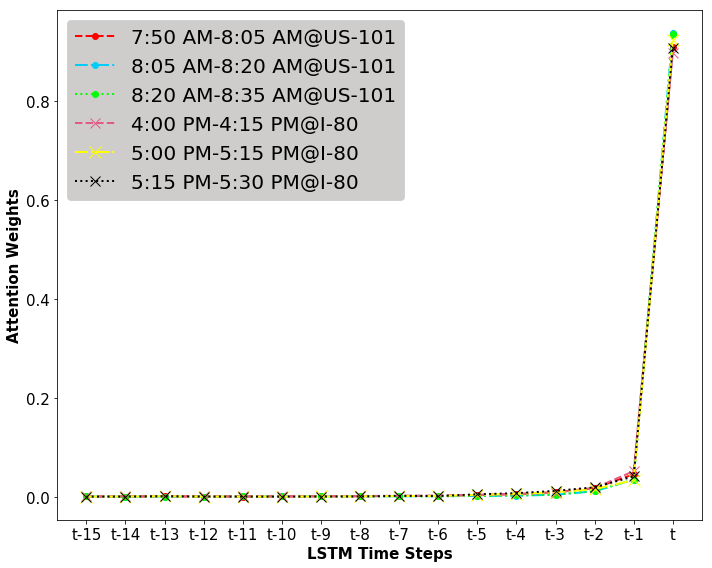

In [17]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) #axs.set_facecolor('#C2C1C0') #objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15] plt.plot(x_pos[0:5], edge_15['weight'], color = '#DD8CFF', linestyle = '-', marker = 'o',linewidth=2.0, label = "Community 1") #plt.xticks(x_pos, objects)
x = [i + 0.5 for i in range(16)]

objects = ('t-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1', 't')

plt.plot(x, ts_cen_ave.iloc[0, :].values, color = '#FF0000', linestyle = '--', marker = 'o', linewidth=2.0, label = "7:50 AM-8:05 AM@US-101") 
#axs.set_xlim([0, 20])
plt.xticks(x, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6')#,'6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[1, :].values, color = '#00CDF9', linestyle = '-.', marker = 'o',linewidth=2.0, label = "8:05 AM-8:20 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[2, :].values, color = '#03FD04', linestyle = ':', marker = 'o', linewidth=2.0, label = "8:20 AM-8:35 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5]#12.5, 15 plt.plot(x_pos[0:4], edge_6['weight'], color = '#F28827', linestyle = '-', marker = 'x',markersize=10, linewidth=2.0, label = "Community 5") #plt.xticks(x_pos, objects)

#x_pos = [0, 2.5, 5, 7.5, 10, 12.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[3, :].values, color = '#E15B86', linestyle = '--', marker = 'x', markersize=10, linewidth=2.0, label = "4:00 PM-4:15 PM@I-80")

#x_pos = [0, 2.5, 5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[4, :].values, color = '#FFFF00', linestyle = '-.', marker = 'x', markersize=12, linewidth=2.0, label = "5:00 PM-5:15 PM@I-80")

#x_pos = [0, 2.5, 5, 7.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[5, :].values, color = '#000000', linestyle = ':', marker = 'x',markersize=10, linewidth=2.0, label = "5:15 PM-5:30 PM@I-80")


legend = plt.legend(fontsize = 20) 
legend.get_frame().set_facecolor('#C2C1C0')

plt.ylabel('Attention Weights',fontsize=15, weight = 'bold') #plt.yticks(y_pos,['10', '20', '30', '40', '50']) #plt.title('Bike Sharing Demand by Trip Distances', fontsize=18) 
plt.xlabel('LSTM Time Steps',fontsize=15, weight = 'bold') 
plt.xticks(fontsize=15, rotation=0) 
plt.yticks(fontsize=15)

fig.tight_layout() #plt.show() 
plt.savefig('images/ave_normalized_edge_weight_vs_dist.png', bbox_inches='tight')

In [18]:
wt_ha = pd.read_csv('../data/trajectory/wt_ha.csv')
wt_ha.shape

(1505756, 41)

In [19]:
wt_ha = wt_ha[wt_ha.columns[1:]]
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.003429,0.000605,0.001037,...,0.001037,0.126874,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.831779
1,0.001107,0.001370,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,...,0.001107,0.001107,0.001107,0.001107,0.001107,0.026525,0.001107,0.001107,0.001107,0.903759
2,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,...,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.044887,0.739603
3,0.008078,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,...,0.019684,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.704703
4,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.001848,0.003414,...,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.868417


In [20]:
wt_ha['dsID'] = dsID

In [21]:
wt_ha_ave = wt_ha.groupby(['dsID']).mean().reset_index(drop = True)
wt_ha_ave

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001779,0.001438,0.001379,0.002299,0.001621,0.001329,0.002519,0.001889,0.001335,0.002671,...,0.006178,0.041855,0.007080,0.005626,0.031155,0.006344,0.003255,0.013553,0.003610,0.724367
1,0.001705,0.001418,0.001375,0.002128,0.001520,0.001329,0.002402,0.001764,0.001322,0.002568,...,0.006999,0.042483,0.007750,0.005975,0.031526,0.006379,0.003476,0.013961,0.003619,0.735927
2,0.001713,0.001411,0.001365,0.002122,0.001516,0.001320,0.002386,0.001772,0.001317,0.002577,...,0.006597,0.041351,0.007500,0.005656,0.029649,0.006096,0.003418,0.012160,0.003491,0.742178
3,0.002070,0.001606,0.001540,0.002720,0.001783,0.001476,0.002901,0.002110,0.001482,0.003136,...,0.006434,0.042928,0.006146,0.005768,0.031278,0.005598,0.003370,0.015516,0.003446,0.705036
4,0.001654,0.001115,0.001031,0.002352,0.001430,0.000977,0.002494,0.001760,0.001004,0.002667,...,0.004239,0.036737,0.003720,0.004234,0.032266,0.004112,0.002317,0.014273,0.002693,0.715829
5,0.001499,0.001160,0.001086,0.002089,0.001453,0.001044,0.002228,0.001747,0.001066,0.002370,...,0.003272,0.031201,0.003019,0.003283,0.027690,0.003329,0.001936,0.011885,0.002115,0.729443


In [22]:
i = 0
nbr_attention_ds = wt_ha_ave.iloc[i,0:39].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 39]
nbr_attention_ds

array([[0.00177887, 0.00143785, 0.00137913],
       [0.00229853, 0.00162134, 0.00132892],
       [0.00251918, 0.00188944, 0.00133499],
       [0.00267097, 0.00212954, 0.00135845],
       [0.0028247 , 0.00224338, 0.00140391],
       [0.00293858, 0.00171013, 0.00147761],
       [0.00300396, 0.72436717, 0.00175313],
       [0.00475041, 0.00582762, 0.00512477],
       [0.00659874, 0.02943364, 0.00758805],
       [0.00670428, 0.043015  , 0.00731124],
       [0.00617839, 0.04185512, 0.00708011],
       [0.00562569, 0.03115506, 0.00634449],
       [0.00325459, 0.01355321, 0.00360968]])

In [23]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.72, 0.  ],
       [0.  , 0.01, 0.01],
       [0.01, 0.03, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [24]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

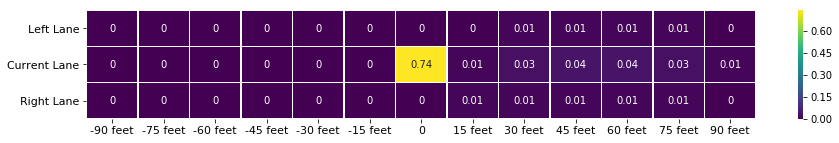

In [25]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

# Take average directly

In [26]:
wt_ha_ave = wt_ha.mean()
wt_ha_ave.values[0:39]

array([0.00176044, 0.00136185, 0.00129903, 0.00232121, 0.00155982,
       0.00124725, 0.00252453, 0.00184997, 0.00125624, 0.00270442,
       0.00213476, 0.00129131, 0.00279952, 0.00235521, 0.00134914,
       0.00291711, 0.00169607, 0.00142426, 0.00295157, 0.00165312,
       0.00172761, 0.00463907, 0.00674441, 0.00474538, 0.00615745,
       0.03613709, 0.00637571, 0.00601205, 0.04563512, 0.00625923,
       0.00573871, 0.04007779, 0.00596532, 0.00520612, 0.03105182,
       0.00541366, 0.0030125 , 0.01383304, 0.00323326])

In [27]:
nbr_attention_ds = wt_ha_ave.values[0:39]
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.values[39]
nbr_attention_ds

array([[0.00176044, 0.00136185, 0.00129903],
       [0.00232121, 0.00155982, 0.00124725],
       [0.00252453, 0.00184997, 0.00125624],
       [0.00270442, 0.00213476, 0.00129131],
       [0.00279952, 0.00235521, 0.00134914],
       [0.00291711, 0.00169607, 0.00142426],
       [0.00295157, 0.72357781, 0.00172761],
       [0.00463907, 0.00674441, 0.00474538],
       [0.00615745, 0.03613709, 0.00637571],
       [0.00601205, 0.04563512, 0.00625923],
       [0.00573871, 0.04007779, 0.00596532],
       [0.00520612, 0.03105182, 0.00541366],
       [0.0030125 , 0.01383304, 0.00323326]])

In [28]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.72, 0.  ],
       [0.  , 0.01, 0.  ],
       [0.01, 0.04, 0.01],
       [0.01, 0.05, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [29]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

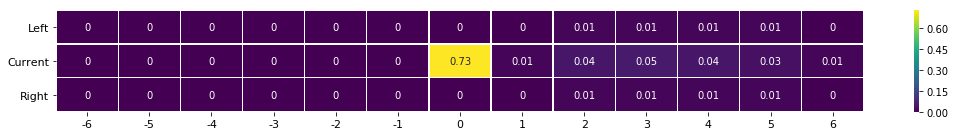

In [30]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left', 'Current', 'Right'] # need to double check the left, current, right order!
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
#plt.show()

fig.tight_layout() #plt.show() 
plt.savefig('images/average_vehicle_level_attention_distribution.png', bbox_inches='tight')

In [31]:
nbr_loc = pd.read_csv('../data/trajectory/nbr_location.csv')
nbr_loc = nbr_loc[nbr_loc.columns[1:]]
nbr_loc.shape

(1505756, 39)

In [32]:
nbr_loc = np.reshape(nbr_loc.values, [-1, 13, 3])

In [33]:
nbr_loc = np.sum(nbr_loc, 0) # sum by first dimension
nbr_loc

array([[147764, 182269, 149434],
       [300572, 377771, 302293],
       [305682, 407442, 305376],
       [308088, 414785, 311258],
       [314879, 291149, 316995],
       [311411,  44034, 312920],
       [315060,   7718, 314903],
       [313704,  43955, 311893],
       [317845, 292420, 315395],
       [311763, 415915, 308392],
       [306271, 408401, 306369],
       [303112, 378661, 301253],
       [149743, 182644, 148274]])

In [34]:
nbr_loc = nbr_loc.T

In [35]:
nbr_loc

array([[147764, 300572, 305682, 308088, 314879, 311411, 315060, 313704,
        317845, 311763, 306271, 303112, 149743],
       [182269, 377771, 407442, 414785, 291149,  44034,   7718,  43955,
        292420, 415915, 408401, 378661, 182644],
       [149434, 302293, 305376, 311258, 316995, 312920, 314903, 311893,
        315395, 308392, 306369, 301253, 148274]])

# Import testing dataset

In [37]:
D = scp.loadmat('/home/lei/workspace/data/trajectory/TestSet.mat')['traj']

In [38]:
# 1-dataset ID, 2-vehicle ID, 3-frame id, 4-local x, 5-local y, 6-lane id
# 7-lateral move 8-longitunal move 
# 9-21 neighbor vehicles from back -90 feet to front 90 feet at left lane
# 22-34 ...at middle lane
# 35-47 ...at right lane
df_ts = pd.DataFrame(D)
df_ts.shape

(1505756, 47)

In [39]:
df_ts.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,2490.0,7192.0,52.000000,160.218994,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2490.0,7193.0,52.001999,164.007004,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2490.0,7194.0,51.922001,167.699005,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2490.0,7195.0,51.821999,171.539001,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2490.0,7196.0,51.813999,175.531998,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_ts.iloc[0,8:].values

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 2486.,
          0.,    0., 2483.,    0.,    0.,    0.,    0., 2485.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.], dtype=float32)

In [41]:
df_ts.iloc[0,8:].values.reshape(3, 13).T.reshape(1, 39)

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2485.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2486.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2483.,    0.,    0.,
           0.,    0.,    0.]], dtype=float32)

In [42]:
wt_ha['vehID'] = vehid
wt_ha['time_step'] = T
wt_ha['dsID'] = dsID

# Skip this 

In [ ]:
dsID1 = pd.read_csv('../data/trajectory_data/us101-0750-0805.csv',  header = None)
dsID2 = pd.read_csv('../data/trajectory_data/us101-0805-0820.csv',  header = None)
dsID3 = pd.read_csv('../data/trajectory_data/us101-0820-0835.csv', header = None)
dsID4 = pd.read_csv('../data/trajectory_data/i80-1600-1615.csv', header = None)
dsID5 = pd.read_csv('../data/trajectory_data/i80-1700-1715.csv',  header = None)
dsID6 = pd.read_csv('../data/trajectory_data/i80-1715-1730.csv',  header = None)
# first column veh ID
# 11 column veh class 1 = motorcycle, 2 = auto, 3 = truck.

In [ ]:
dsID1 = dsID1[dsID1.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID1['dsID'] = 1
dsID2 = dsID2[dsID2.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID2['dsID'] = 2
dsID3 = dsID3[dsID3.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID3['dsID'] = 3
dsID4 = dsID4[dsID4.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID4['dsID'] = 4
dsID5 = dsID5[dsID5.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID5['dsID'] = 5
dsID6 = dsID6[dsID6.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID6['dsID'] = 6

In [ ]:
veh_class = pd.concat([dsID1, dsID2, dsID3, dsID4, dsID5, dsID6])
veh_class.columns = ['vehID', 'veh_class', 'dsID']
veh_class.to_csv('veh_class.csv')

In [ ]:
tem = dsID1[dsID1.iloc[:, 0] == 2]
tem[tem.columns[10]][0]

# comparison of passenger vehicle and trucks (as ego-vehicles)

In [43]:
veh_class = pd.read_csv('veh_class.csv')
veh_class = veh_class[veh_class.columns[1:]]
veh_class.head()

,vehID,veh_class,dsID
0,2,2,1
1,4,2,1
2,5,2,1
3,6,2,1
4,8,2,1


In [44]:
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,dsID,vehID,time_step
0,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.003429,0.000605,0.001037,...,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.831779,5,2387,6860.0
1,0.001107,0.001370,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,...,0.001107,0.001107,0.026525,0.001107,0.001107,0.001107,0.903759,2,2505,9187.0
2,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,...,0.003575,0.003575,0.003575,0.003575,0.003575,0.044887,0.739603,4,3016,8819.0
3,0.008078,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,...,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.704703,6,2420,10223.0
4,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.001848,0.003414,...,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.868417,4,3343,1187.0


In [45]:
new_wt_ha = pd.merge(wt_ha, veh_class, how='left', on=['dsID','vehID'])
new_wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,dsID,vehID,time_step,veh_class
0,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.003429,0.000605,0.001037,...,0.001037,0.001037,0.001037,0.001037,0.001037,0.831779,5,2387,6860.0,2
1,0.001107,0.001370,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,...,0.001107,0.026525,0.001107,0.001107,0.001107,0.903759,2,2505,9187.0,2
2,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,...,0.003575,0.003575,0.003575,0.003575,0.044887,0.739603,4,3016,8819.0,2
3,0.008078,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,...,0.001281,0.001281,0.001281,0.001281,0.001281,0.704703,6,2420,10223.0,2
4,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.001848,0.003414,...,0.003414,0.003414,0.003414,0.003414,0.003414,0.868417,4,3343,1187.0,2


In [46]:
new_wt_ha['veh_class'].value_counts()

2    1455668
3      41291
1       8797
Name: veh_class, dtype: int64

In [47]:
new_wt_ha_ave = new_wt_ha.groupby(['veh_class']).mean().reset_index()
new_wt_ha_ave

,veh_class,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,dsID,vehID,time_step
0,1,0.002316,0.002193,0.002130,0.002487,0.002268,0.002070,0.002587,0.002423,0.002098,...,0.004964,0.020804,0.007886,0.003672,0.010091,0.004907,0.749837,3.814937,2618.175287,7101.491190
1,2,0.001749,0.001353,0.001290,0.002309,0.001553,0.001238,0.002514,0.001846,0.001247,...,0.005177,0.031408,0.005398,0.002991,0.013920,0.003219,0.721384,3.339774,2536.616444,8517.295835
2,3,0.002042,0.001513,0.001444,0.002726,0.001653,0.001386,0.002892,0.001869,0.001399,...,0.006296,0.020678,0.005433,0.003613,0.011569,0.003376,0.795321,3.651401,2550.065341,8486.725727


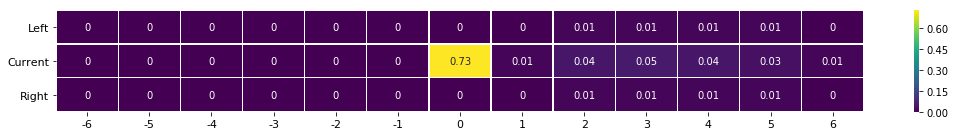

In [48]:
i = 1  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
#objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
#x_pos = [i for i in range(14)] 
objects = ('-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left', 'Current', 'Right']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
#plt.show()
fig.tight_layout() 
plt.savefig('images/auto_ego_vehicle.png', bbox_inches='tight')

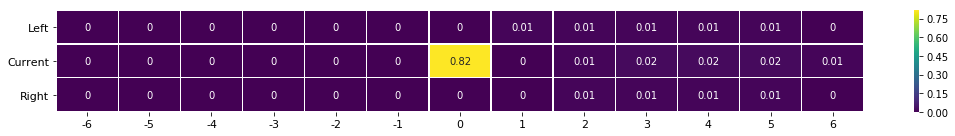

In [49]:
i = 2  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left', 'Current', 'Right']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
#plt.show()
fig.tight_layout() 
plt.savefig('images/truck_ego_vehicle.png', bbox_inches='tight')

# attention received by vehicle_class

In [50]:
vehid['dsID'] = dsID
vehid['time'] = T
vehid.columns = ['vehID', 'dsID', 'time']
#ds_ts.columns[0:2] = []

In [51]:
vehid.head()

,vehID,dsID,time
0,2387,5,6860.0
1,2505,2,9187.0
2,3016,4,8819.0
3,2420,6,10223.0
4,3343,4,1187.0


In [52]:
df_ts.columns = ['dsID', 'vehID', 'time', 'real_x', 'real_y', 'laneID', 'lateral_move', 'long_move']+ ['nbr_'+str(i) for i in range(39)]

In [53]:
df_ts = pd.merge(vehid, df_ts, how='left', on=['dsID','vehID', 'time'])
df_ts.head()

,vehID,dsID,time,real_x,real_y,laneID,lateral_move,long_move,nbr_0,nbr_1,...,nbr_29,nbr_30,nbr_31,nbr_32,nbr_33,nbr_34,nbr_35,nbr_36,nbr_37,nbr_38
0,2387,5,6860.0,41.255001,558.804993,4.0,1.0,2.0,0.0,2245.0,...,0.0,2247.0,0.0,0.0,0.0,2170.0,0.0,0.0,2153.0,0.0
1,2505,2,9187.0,6.307000,833.888000,1.0,1.0,1.0,0.0,0.0,...,0.0,2510.0,0.0,0.0,2503.0,0.0,0.0,0.0,2500.0,0.0
2,3016,4,8819.0,4.126000,1505.906982,1.0,1.0,1.0,0.0,0.0,...,2992.0,0.0,0.0,0.0,0.0,2980.0,0.0,0.0,0.0,2974.0
3,2420,6,10223.0,68.112999,1186.078979,6.0,1.0,1.0,2434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3343,4,1187.0,41.860001,366.121002,4.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,287.0,0.0,0.0,0.0,0.0,270.0,0.0


In [54]:
df_ts.shape

(1505756, 47)

In [55]:
res = []
res_ds = []
for i in range(df_ts.shape[0]):
    res_ds.append([int(df_ts.iloc[i, 1])]*39)
    tem = df_ts.iloc[i,8:].values.reshape(3, 13).T.reshape(39, 1) # cong hengxiang jishu dao zongxiang jishu 
    res.append(tem)

In [56]:
res_ds = np.concatenate(res_ds, 0) # which data set the neighbor is

In [57]:
res_ds.shape

(58724484,)

In [58]:
res = np.concatenate(res, 0) # the neighbor id

In [59]:
res.shape

(58724484, 1)

In [60]:
attention = wt_ha.iloc[:, 0:39].values.reshape([-1, 1]) # corresponding attention
attention.shape

(58724484, 1)

In [61]:
res_atten = pd.DataFrame(res)
res_atten.head()

,0
0,0.0
1,0.0
2,0.0
3,2245.0
4,0.0


In [62]:
res_atten['dsID'] = res_ds
res_atten['attention'] = attention

In [63]:
res_atten.columns = ['vehID', 'dsID', 'attention']

In [64]:
new_res_atten = pd.merge(res_atten, veh_class, how='left', on=['dsID','vehID'])
new_res_atten.head()

,vehID,dsID,attention,veh_class
0,0.0,5,0.001037,NaN
1,0.0,5,0.001037,NaN
2,0.0,5,0.001037,NaN
3,2245.0,5,0.001037,2.0
4,0.0,5,0.001037,NaN


In [65]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].mean()
new_res_atten_ave

veh_class
1.0    0.026456
2.0    0.030561
3.0    0.020842
Name: attention, dtype: float64

In [66]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].std()
new_res_atten_ave

veh_class
1.0    0.045927
2.0    0.055411
3.0    0.039561
Name: attention, dtype: float64

In [67]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].count()
new_res_atten_ave

veh_class
1.0       40813
2.0    11253428
3.0      286487
Name: attention, dtype: int64

In [68]:
# only compare the accumulated attention when passenger vehs/trucks are in the front of the current lane (25 is the index)
batch = new_res_atten.shape[0] // 39

final_res = []
#last = 0
for i in range(batch):
    #nbr_b = i // 39
    #if nbr_b != last: # avoid the duplicates, for example, 10, 24, 33, the same neighbor row will be added three times
    final_res.append(new_res_atten.iloc[[i*39 + d for d in [22, 25, 28, 31, 34, 37]],]) # the front of the current lane
    #last = nbr_b

In [69]:
final_res = pd.concat(final_res).reset_index(drop = True)
final_res.head()

,vehID,dsID,attention,veh_class
0,0.0,5,0.001037,NaN
1,2296.0,5,0.001037,2.0
2,0.0,5,0.001037,NaN
3,2342.0,5,0.126874,2.0
4,0.0,5,0.001037,NaN


In [70]:
final_res['grid_index'] = [22, 25, 28, 31, 34, 37] * 1505756

In [71]:
final_res = final_res[final_res['vehID'] != 0].reset_index(drop = True)
final_res.head()

,vehID,dsID,attention,veh_class,grid_index
0,2296.0,5,0.001037,2.0,25
1,2342.0,5,0.126874,2.0,31
2,2417.0,6,0.203124,2.0,28
3,280.0,4,0.003414,2.0,28
4,2301.0,5,0.160817,2.0,25


In [72]:
final_res_class2 = final_res[final_res['veh_class'] == 2].reset_index(drop = True)
final_res_class2 = final_res_class2[['attention', 'grid_index']]

In [73]:
final_res_ave = final_res.groupby(['veh_class', 'grid_index'])['attention'].mean().reset_index()
final_res_ave

,veh_class,grid_index,attention
0,1.0,22,0.048268
1,1.0,25,0.126572
2,1.0,28,0.100139
3,1.0,31,0.098563
4,1.0,34,0.094075
5,1.0,37,0.080594
6,2.0,22,0.177215
7,2.0,25,0.170841
8,2.0,28,0.153525
9,2.0,31,0.136292


In [74]:
final_res_count = final_res.groupby(['veh_class', 'grid_index'])['attention'].count().reset_index()
final_res_count

,veh_class,grid_index,attention
0,1.0,22,740
1,1.0,25,1810
2,1.0,28,1076
3,1.0,31,1285
4,1.0,34,1303
5,1.0,37,582
6,2.0,22,45873
7,2.0,25,306334
8,2.0,28,433286
9,2.0,31,423447


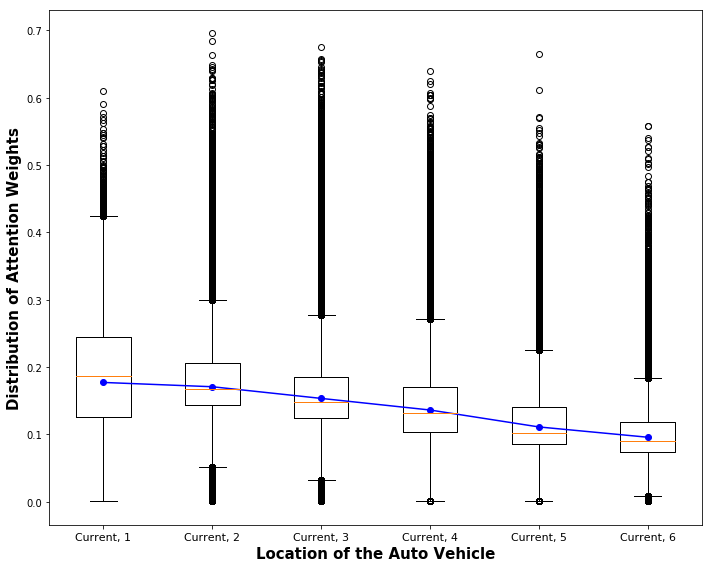

In [75]:
fig, axs = plt.subplots(1,1,figsize=(10,8))

x = [1, 2, 3, 4, 5, 6]
labels = ['Current, 1', 'Current, 2', 'Current, 3', 'Current, 4', 'Current, 5', 'Current, 6']

b1 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 22)]['attention'].values
b2 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 25)]['attention'].values
b3 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 28)]['attention'].values
b4 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 31)]['attention'].values
b5 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 34)]['attention'].values
b6 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 37)]['attention'].values

plt.boxplot([b1, b2, b3, b4, b5, b6])
plt.plot(x, final_res_ave['attention'][6:12].values, '-ob')
plt.xticks(x, labels, rotation=0, fontsize = 11)
plt.xlabel('Location of the Auto Vehicle', fontsize = 15, fontweight='bold')
plt.ylabel('Distribution of Attention Weights', fontsize = 15, fontweight='bold')
#plt.show()

fig.tight_layout() 
plt.savefig('images/auto_attention_from_ego_vehicle.png', bbox_inches='tight')

#plt.savefig('.png', bbox_inches='tight')

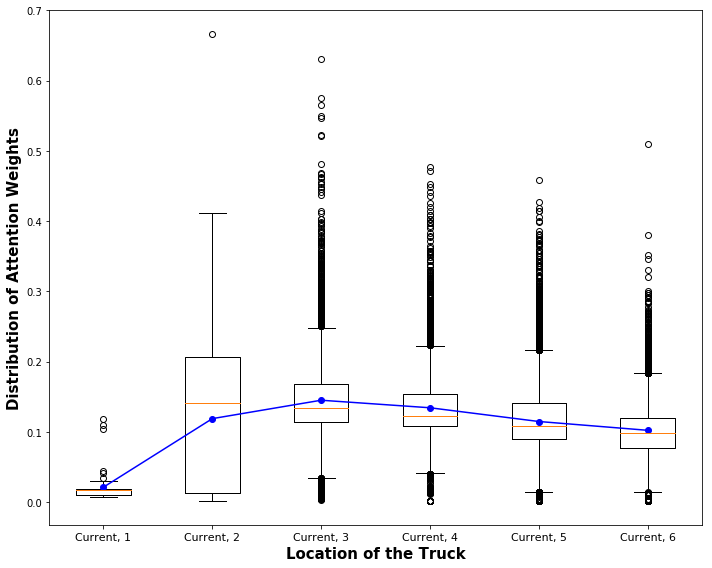

In [76]:
fig, axs = plt.subplots(1,1,figsize=(10,8))

x = [1, 2, 3, 4, 5, 6]
labels = ['Current, 1', 'Current, 2', 'Current, 3', 'Current, 4', 'Current, 5', 'Current, 6']

b1 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 22)]['attention'].values
b2 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 25)]['attention'].values
b3 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 28)]['attention'].values
b4 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 31)]['attention'].values
b5 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 34)]['attention'].values
b6 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 37)]['attention'].values

plt.boxplot([b1, b2, b3, b4, b5, b6])
plt.xticks(x, labels, rotation=0, fontsize = 11)
plt.plot(x, final_res_ave['attention'][12:].values, '-ob')
plt.xlabel('Location of the Truck', fontsize = 15, fontweight='bold')
plt.ylabel('Distribution of Attention Weights', fontsize = 15, fontweight='bold')
#plt.show()

fig.tight_layout() 
plt.savefig('images/truck_attention_from_ego_vehicle.png', bbox_inches='tight')


#plt.savefig('.png', bbox_inches='tight')

# free vs congestion

In [77]:
zeros_df = df_ts.iloc[:, 8:]
zero_count = (zeros_df == 0).astype(int).sum(axis=1)
wt_ha['neighbor_num'] = 39 - zero_count

In [78]:
wt_ha['neighbor_num'].describe()

count    1.505756e+06
mean     7.690973e+00
std      3.415456e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.100000e+01
Name: neighbor_num, dtype: float64

In [79]:
wt_ha['tf_con'] = 0
wt_ha.loc[wt_ha['neighbor_num'] <= 7, 'tf_con'] = 1
#wt_ha.loc[(wt_ha['neighbor_num'] > 7) & (wt_ha['neighbor_num'] <=10), 'tf_con'] = 2
wt_ha.loc[wt_ha['neighbor_num'] >7, 'tf_con'] = 2
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,dsID,vehID,time_step,neighbor_num,tf_con
0,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.003429,0.000605,0.001037,...,0.001037,0.001037,0.001037,0.001037,0.831779,5,2387,6860.0,10,2
1,0.001107,0.001370,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,...,0.026525,0.001107,0.001107,0.001107,0.903759,2,2505,9187.0,5,1
2,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,...,0.003575,0.003575,0.003575,0.044887,0.739603,4,3016,8819.0,3,1
3,0.008078,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,...,0.001281,0.001281,0.001281,0.001281,0.704703,6,2420,10223.0,5,1
4,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.001848,0.003414,...,0.003414,0.003414,0.003414,0.003414,0.868417,4,3343,1187.0,7,1


In [80]:
wt_ha_ave = wt_ha.groupby(['tf_con']).mean().reset_index()
wt_ha_ave

,tf_con,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,dsID,vehID,time_step,neighbor_num
0,1,0.001819,0.001575,0.001536,0.002228,0.001674,0.001491,0.002462,0.001921,0.001486,...,0.029218,0.005784,0.003229,0.01228,0.003379,0.752234,2.862296,2503.652559,8575.035770,5.173391
1,2,0.001692,0.001109,0.001019,0.002431,0.001425,0.000959,0.002599,0.001766,0.000985,...,0.033220,0.004976,0.002757,0.01567,0.003060,0.689700,3.928959,2577.431293,8429.155603,10.667285


In [81]:
i = 0
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

array([[0.00181867, 0.00157537, 0.00153627],
       [0.00222807, 0.0016742 , 0.00149148],
       [0.00246192, 0.00192077, 0.00148593],
       [0.00262448, 0.00210021, 0.0015015 ],
       [0.00267819, 0.00187463, 0.00153406],
       [0.00273286, 0.00163101, 0.00158583],
       [0.00269682, 0.75223413, 0.00178646],
       [0.00472271, 0.00236452, 0.0051425 ],
       [0.00677145, 0.01543611, 0.00749728],
       [0.00687547, 0.0383362 , 0.0075509 ],
       [0.00628787, 0.04003793, 0.00688014],
       [0.00539329, 0.02921798, 0.00578412],
       [0.00322858, 0.01227954, 0.00337948]])

In [82]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.01],
       [0.01, 0.02, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [83]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

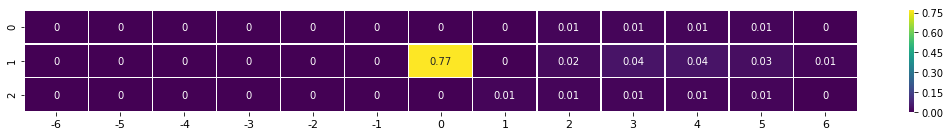

In [84]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
#plt.show()

fig.tight_layout() 
plt.savefig('images/freeflow_ego_vehicle.png', bbox_inches='tight')

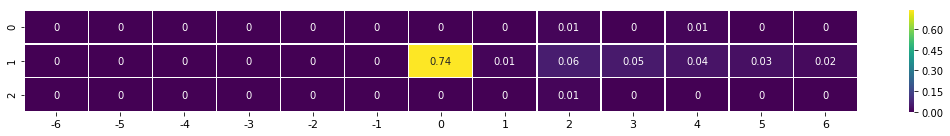

In [85]:
i = 1
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
#plt.show()

fig.tight_layout() 
plt.savefig('images/congested_ego_vehicle.png', bbox_inches='tight')

# attention distribution by lane 

In [86]:
wt_ha['laneID'] = df_ts['laneID']
wt_ha['dsID'] = df_ts['dsID']
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,dsID,vehID,time_step,neighbor_num,tf_con,laneID
0,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.003429,0.000605,0.001037,...,0.001037,0.001037,0.001037,0.831779,5,2387,6860.0,10,2,4.0
1,0.001107,0.001370,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,0.001107,...,0.001107,0.001107,0.001107,0.903759,2,2505,9187.0,5,1,1.0
2,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,0.003575,...,0.003575,0.003575,0.044887,0.739603,4,3016,8819.0,3,1,1.0
3,0.008078,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,0.001281,...,0.001281,0.001281,0.001281,0.704703,6,2420,10223.0,5,1,6.0
4,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.003414,0.001848,0.003414,...,0.003414,0.003414,0.003414,0.868417,4,3343,1187.0,7,1,4.0


In [87]:
wt_ha[wt_ha['laneID'] == 7].shape

(29485, 46)

In [88]:
wt_ha['laneID'].describe()

count    1.505756e+06
mean     3.449473e+00
std      1.624123e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      7.000000e+00
Name: laneID, dtype: float64

In [89]:
wt_ha_ave = wt_ha.groupby(['laneID', 'dsID']).mean().reset_index()
wt_ha_ave

,laneID,dsID,0,1,2,3,4,5,6,7,...,34,35,36,37,38,39,vehID,time_step,neighbor_num,tf_con
0,1.0,1,0.001371,0.001388,0.001304,0.001371,0.001604,0.001244,0.001371,0.001920,...,0.030483,0.007563,0.001371,0.012920,0.004347,0.742409,2760.369541,8275.320789,5.405708,1.194641
1,1.0,2,0.001440,0.001437,0.001386,0.001440,0.001556,0.001321,0.001440,0.001785,...,0.033501,0.007660,0.001440,0.014406,0.004412,0.758334,2367.733409,8853.051864,4.478610,1.029306
2,1.0,3,0.001313,0.001311,0.001251,0.001313,0.001445,0.001192,0.001313,0.001712,...,0.032614,0.007083,0.001313,0.012574,0.003859,0.768658,1783.523673,8795.960838,4.863566,1.053255
3,1.0,4,0.002623,0.002611,0.002499,0.002623,0.002681,0.002374,0.002623,0.002799,...,0.043145,0.011480,0.002623,0.021143,0.006639,0.729767,3066.503822,8607.911043,3.958863,1.003265
4,1.0,5,0.001970,0.001960,0.001850,0.001970,0.002028,0.001741,0.001970,0.002174,...,0.036323,0.007102,0.001970,0.014811,0.004803,0.790902,2597.735575,8111.372591,4.912451,1.032999
5,1.0,6,0.002100,0.002084,0.002042,0.002100,0.002187,0.001988,0.002100,0.002266,...,0.053870,0.004765,0.002100,0.022428,0.003492,0.783034,2468.297893,9714.411367,3.645072,1.020270
6,2.0,1,0.001886,0.001379,0.001303,0.002503,0.001600,0.001239,0.002770,0.001853,...,0.033239,0.007190,0.003377,0.014616,0.003690,0.708660,2750.305255,8241.878359,8.455160,1.536718
7,2.0,2,0.001770,0.001407,0.001353,0.002340,0.001509,0.001295,0.002693,0.001739,...,0.031942,0.007642,0.003650,0.013765,0.003978,0.723103,2342.343262,8779.907167,7.079786,1.371724
8,2.0,3,0.001726,0.001343,0.001283,0.002252,0.001460,0.001227,0.002537,0.001711,...,0.029376,0.006234,0.003213,0.013610,0.003586,0.717923,1786.412635,8732.187038,7.479695,1.464429
9,2.0,4,0.001735,0.001562,0.001502,0.002027,0.001726,0.001430,0.002209,0.001999,...,0.036556,0.005590,0.003648,0.017451,0.003482,0.706885,3051.394133,8451.313512,6.289529,1.252270


In [90]:
wt_ha['x'] = df_ts['real_x']
wt_ha['y'] = df_ts['real_y']
wt_ha['max_attention_index'] = wt_ha.iloc[:, 0:39].idxmax(axis = 1)

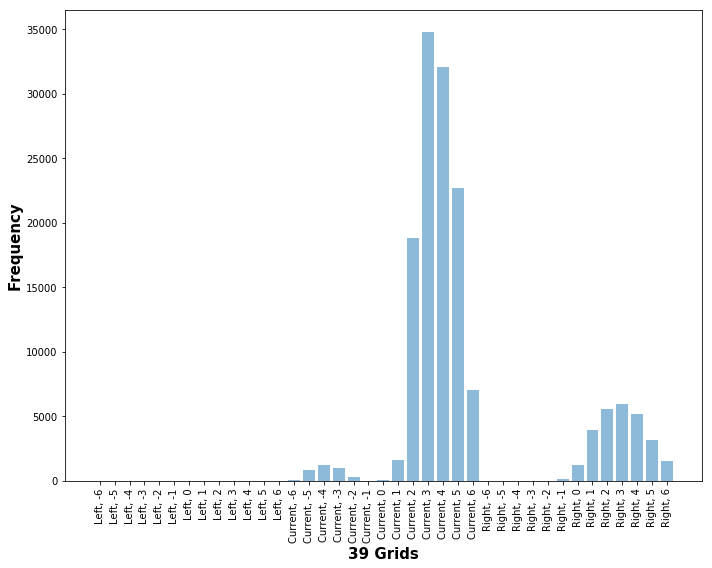

In [91]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 1) | (wt_ha['dsID'] == 2) | (wt_ha['dsID'] == 3)) & (wt_ha['laneID'] == 1)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_us101_left.png', bbox_inches='tight')


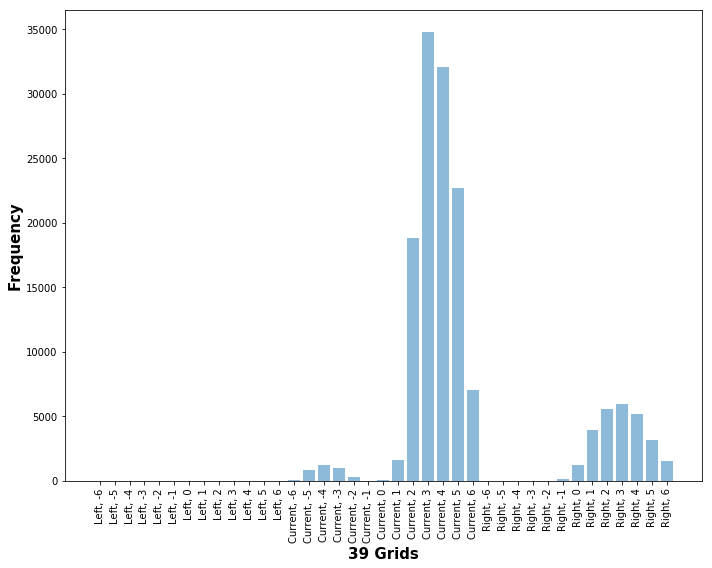

In [92]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 1) | (wt_ha['dsID'] == 2) | (wt_ha['dsID'] == 3)) & (wt_ha['laneID'] == 1)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_us101_middle.png', bbox_inches='tight')


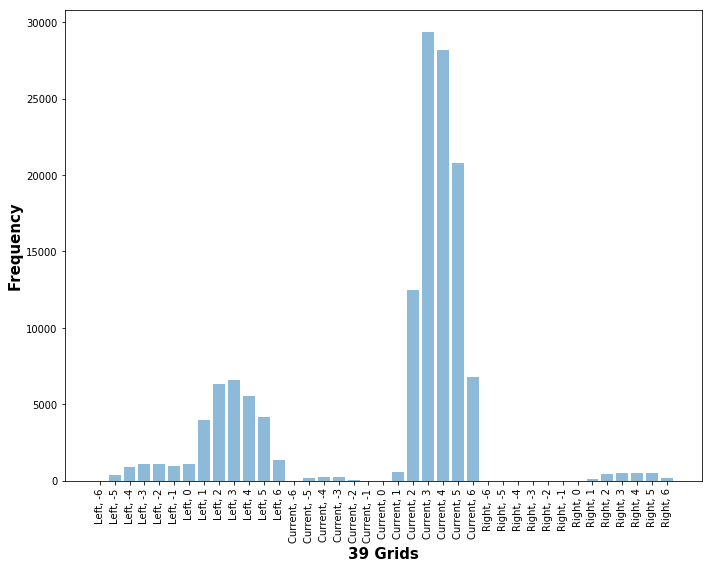

In [119]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 1) | (wt_ha['dsID'] == 2) | (wt_ha['dsID'] == 3)) & (wt_ha['laneID'] == 5)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_us101_right.png', bbox_inches='tight')


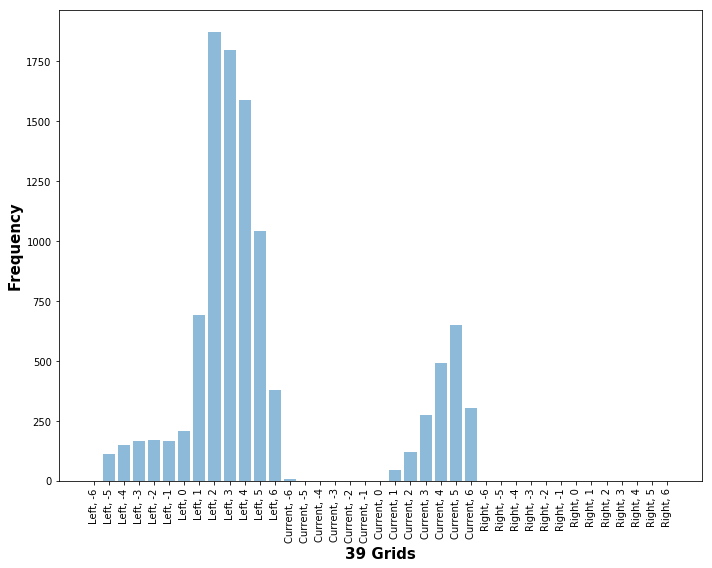

In [93]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 1) | (wt_ha['dsID'] == 2) | (wt_ha['dsID'] == 3)) & (wt_ha['laneID'] == 6)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_us101_ramp.png', bbox_inches='tight')


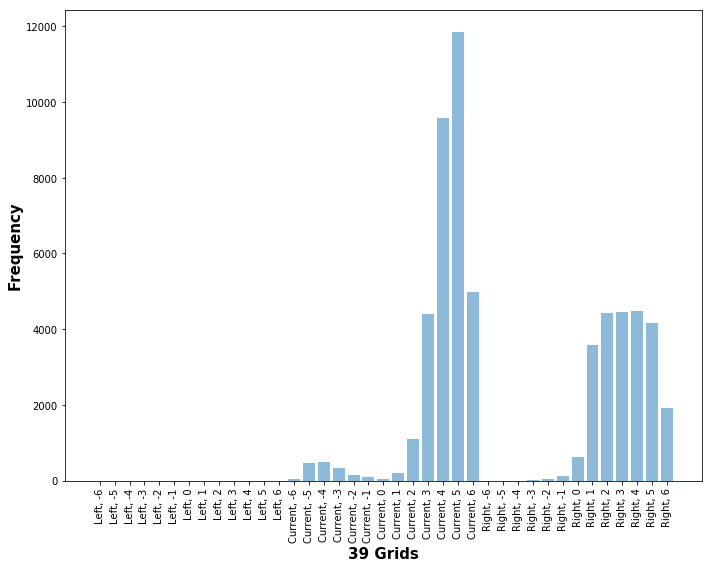

In [94]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 4) | (wt_ha['dsID'] == 5) | (wt_ha['dsID'] == 6)) & (wt_ha['laneID'] == 1)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_i80_left.png', bbox_inches='tight')


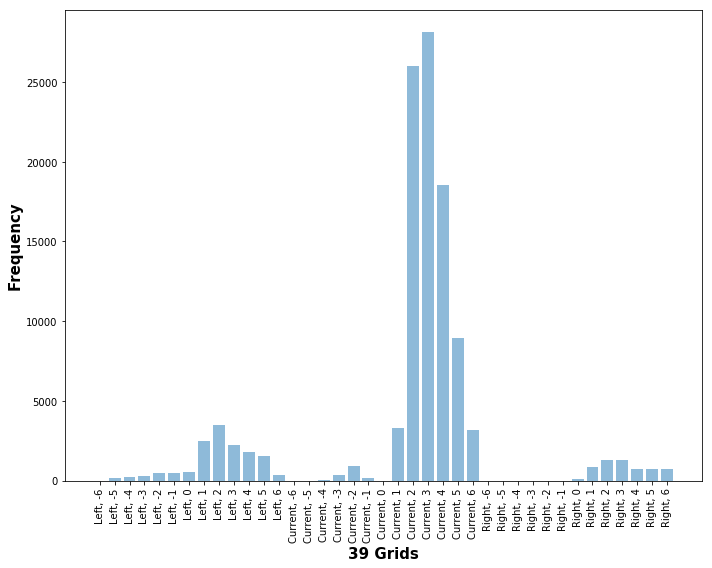

In [95]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 4) | (wt_ha['dsID'] == 5) | (wt_ha['dsID'] == 6)) & (wt_ha['laneID'] == 3)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_i80_middle.png', bbox_inches='tight')


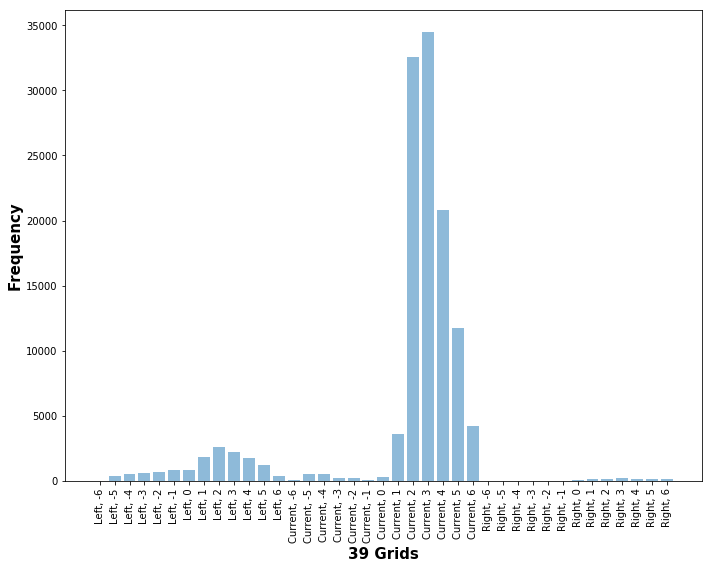

In [96]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 4) | (wt_ha['dsID'] == 5) | (wt_ha['dsID'] == 6)) & (wt_ha['laneID'] == 6)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_i80_right.png', bbox_inches='tight')


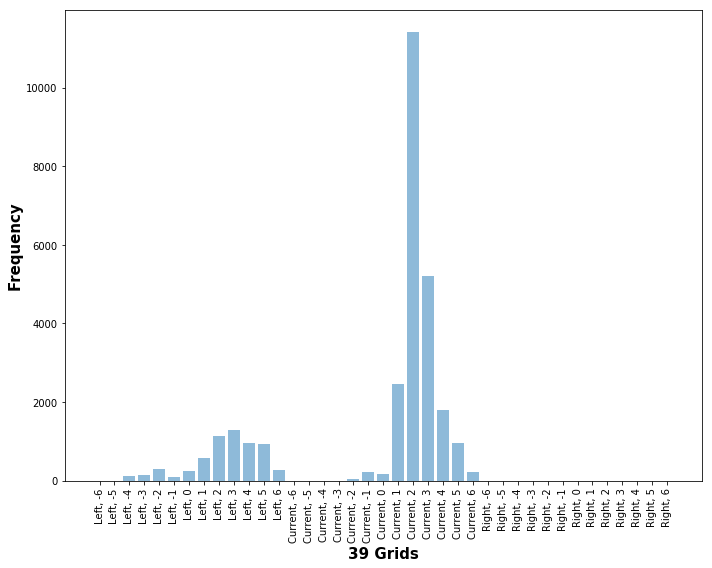

In [118]:
# lane: 1  ds: 1 # the segment before lane 7
tem = wt_ha[((wt_ha['dsID'] == 4) | (wt_ha['dsID'] == 5) | (wt_ha['dsID'] == 6)) & (wt_ha['laneID'] == 7)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
plt.savefig('images/maximum_att_grid_i80_ramp.png', bbox_inches='tight')


In [97]:
wt_ha_lane7_i80 = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 7)].reset_index(drop = True)
wt_ha_lane7_i80 = wt_ha_lane7_i80.sort_values(by = ['y'], ascending = True)
wt_ha_lane7_i80 # so lane 7 starts at around 145-the ramp


,0,1,2,3,4,5,6,7,8,9,...,39,dsID,vehID,time_step,neighbor_num,tf_con,laneID,x,y,max_attention_index
2184,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,...,0.837577,6,2468,9580.0,2,1,7.0,96.726997,145.266998,31
4951,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,...,0.837389,6,2468,9581.0,2,1,7.0,96.726997,145.570999,31
5020,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,...,0.837228,6,2468,9582.0,2,1,7.0,96.726997,145.875000,31
4347,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,...,0.836147,6,2468,9583.0,2,1,7.0,96.727997,146.175995,31
3781,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,...,0.835777,6,2468,9584.0,2,1,7.0,96.727997,146.483002,31
1655,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,...,0.838939,6,2468,9585.0,2,1,7.0,96.727997,146.802002,31
1293,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,...,0.838826,6,2468,9586.0,2,1,7.0,96.728996,147.126999,31
866,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,...,0.837053,6,2468,9587.0,2,1,7.0,96.727997,147.445999,31
3905,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,...,0.827953,6,2468,9588.0,2,1,7.0,96.728996,147.753006,31
981,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,...,0.832348,6,2468,9589.0,2,1,7.0,96.728996,148.054001,31


In [98]:
wt_ha_lane7_i80['vehID'].unique()

array([2468, 2463, 2488, 2459, 2480, 2437, 2446, 2475, 2420, 3004, 3003])

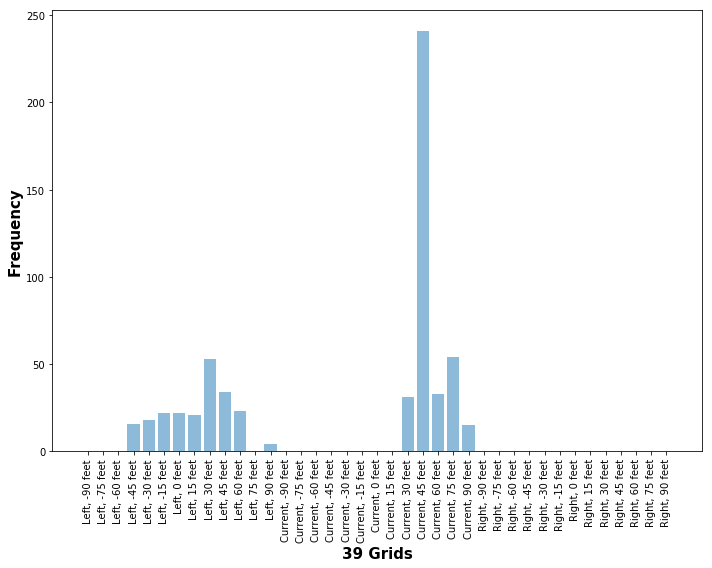

In [99]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 6) & (wt_ha['y'] >= 0) & (wt_ha['y'] <= 145)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


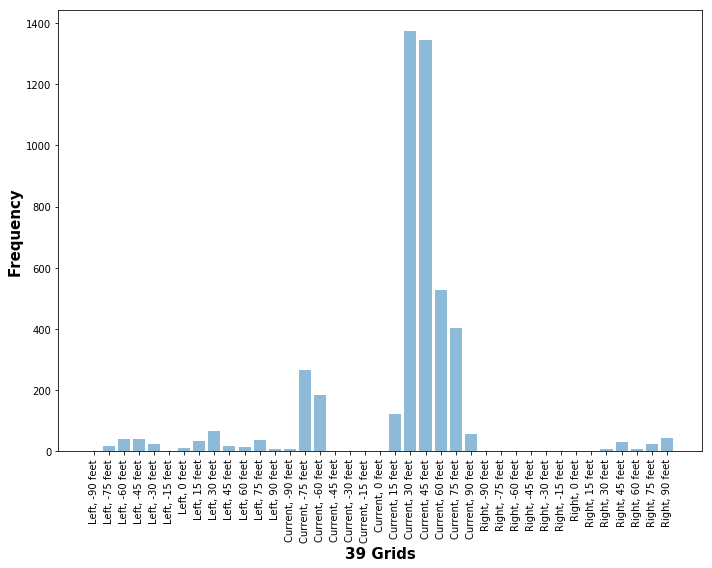

In [100]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 6) & (wt_ha['y'] >= 145) & (wt_ha['y'] <= 665)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


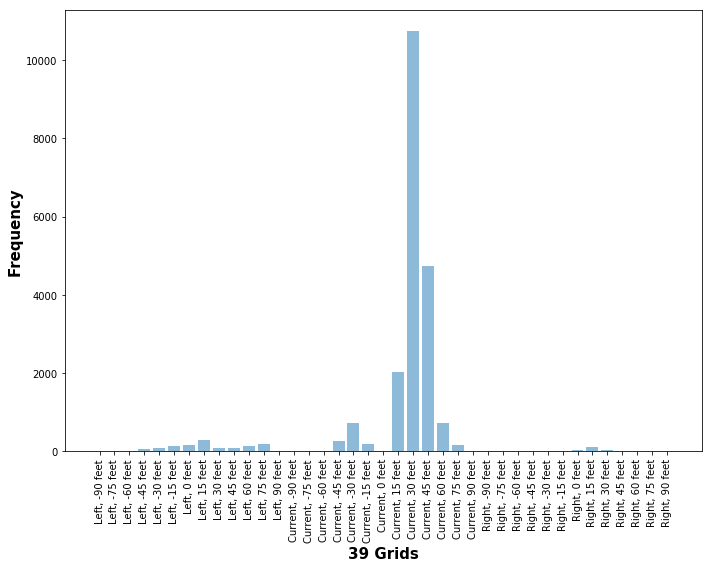

In [101]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 3)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


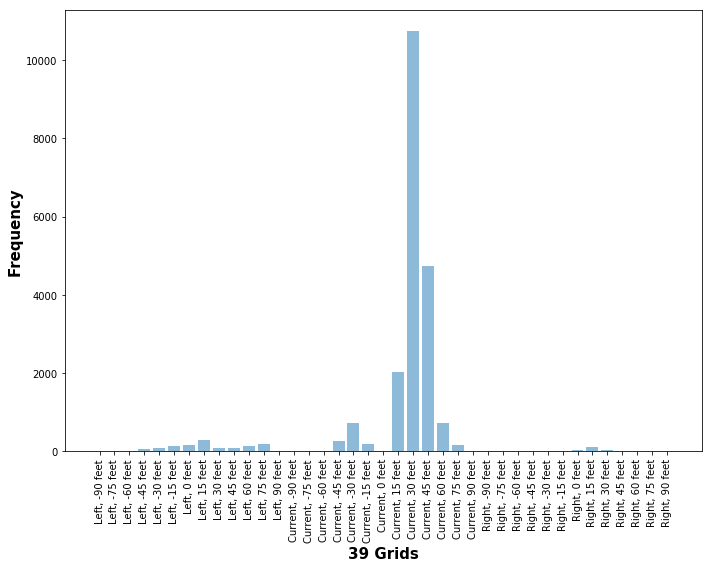

In [102]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 3)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


# Attention change by time for a single vehicle

In [103]:
tem = wt_ha[(wt_ha['dsID'] == 5)].reset_index(drop = True)
tem_vehID = tem.vehID.unique()
veh_lane_changing = []
traj_len = []
for v in tem_vehID:
    tem_lane = tem[tem['vehID'] == v]['laneID'].unique()
    if len(tem_lane) > 1: # lane changing happens
        veh_lane_changing.append(v)
        traj_len.append(tem[tem['vehID'] == v]['laneID'].shape[0])

In [104]:
veh_lane_changing

[2583,
 2590,
 2476,
 2611,
 2791,
 2445,
 2630,
 2725,
 2497,
 2427,
 2344,
 2595,
 2780,
 2301,
 2793,
 2407,
 2558,
 2542,
 2704,
 2772,
 2582,
 2384,
 2514,
 2413,
 2560,
 2669,
 2366,
 2442,
 2782,
 2519,
 2333,
 2365,
 2822,
 2421,
 2402,
 2561,
 2742,
 2858,
 2300,
 2521,
 2368,
 2509,
 2829,
 2675,
 2455,
 2531,
 2547,
 2518,
 2312,
 2618,
 2525,
 2681,
 2412,
 2638,
 2841,
 2543,
 2838,
 2612,
 2567,
 2860,
 2689,
 2566,
 2616,
 2845,
 2474,
 2743,
 2499,
 2481,
 2728,
 2862,
 2501,
 2394,
 2711,
 2360,
 2670,
 2335,
 2381,
 2532,
 2389,
 2342,
 2794,
 2609,
 2554,
 2831,
 2586,
 2864,
 2866,
 2511,
 2730,
 2661,
 2484]

In [105]:
a = traj_len.index(max(traj_len))
v = veh_lane_changing[a]

In [106]:
v = 2858

In [107]:
lane_change = wt_ha[(wt_ha['dsID'] == 5) & (wt_ha['vehID'] == v)].sort_values('time_step', ascending = True).reset_index(drop = True)
lane_change.head()

,0,1,2,3,4,5,6,7,8,9,...,39,dsID,vehID,time_step,neighbor_num,tf_con,laneID,x,y,max_attention_index
0,0.000817,0.000817,0.000817,0.000817,0.000817,0.000817,0.000817,0.000817,0.000817,0.000817,...,0.712310,5,2858,8087.0,6,1,4.0,42.282001,63.791000,28
1,0.000816,0.000816,0.000816,0.000816,0.000816,0.000816,0.000816,0.000816,0.000816,0.000816,...,0.711355,5,2858,8088.0,6,1,4.0,42.311001,64.112999,28
2,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,...,0.711026,5,2858,8089.0,6,1,4.0,42.341000,64.433998,28
3,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,...,0.710450,5,2858,8090.0,6,1,4.0,42.369999,64.755997,28
4,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,0.000815,...,0.709367,5,2858,8091.0,6,1,4.0,42.398998,65.077003,28


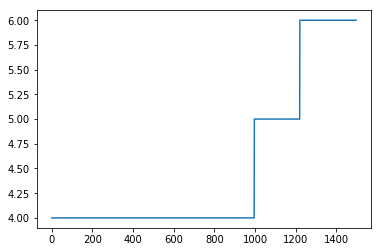

In [108]:
plt.plot(lane_change['laneID'])

In [109]:
index_conversion = pd.DataFrame(np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0))
index_conversion.columns = ['old_index']
index_conversion

,old_index
0,0
1,3
2,6
3,9
4,12
5,15
6,18
7,21
8,24
9,27


In [110]:
new_index = []
for index, row in lane_change.iterrows():
    old = row['max_attention_index']
    new_index.append(index_conversion[index_conversion['old_index'] == int(old)].index)

In [111]:
new_index[0]

Int64Index([22], dtype='int64')

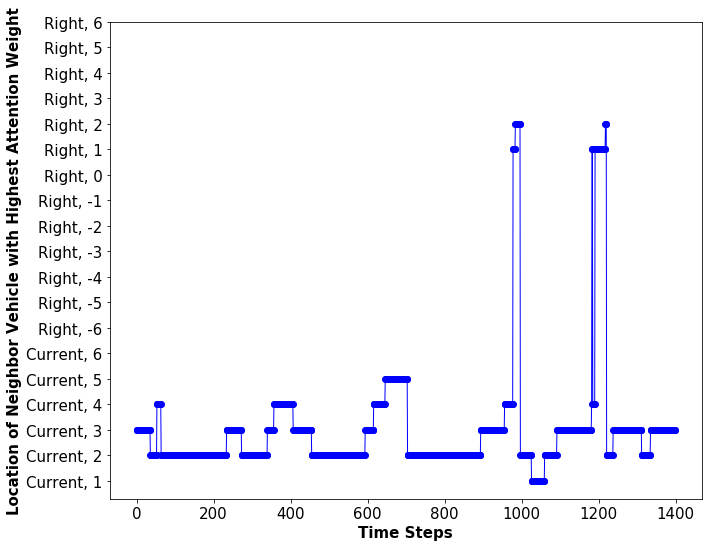

In [112]:

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = len(speed)
x = range(1400)

plt.plot(x,new_index[:1400],'ob-', linewidth=1.0)

lane = ['Left', 'Current', 'Right']
feet = ['-6', '-5', '-4', '-3', '-2', '-1', '0', 
       '1', '2', '3', '4', '5', '6']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)
        
plt.yticks(np.arange(20, 39, 1.0), coordinate[20:])    

axs.set_xlabel('Time Steps', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Location of Neighbor Vehicle with Highest Attention Weight', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 15)
axs.tick_params('x', colors='k', labelsize = 15)


fig.tight_layout()
plt.savefig('images/attention_single_veh.png', bbox_inches='tight')

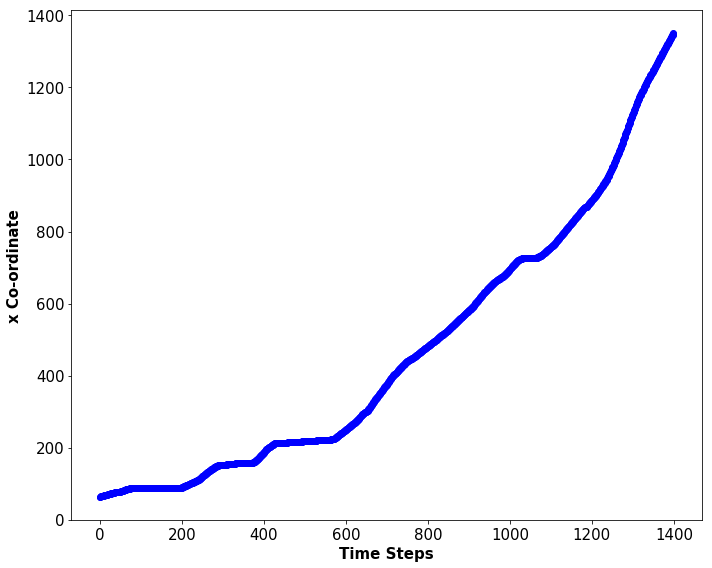

In [113]:

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = len(speed)
x = range(1400)
#plt.plot()
plt.plot(x,lane_change['y'].values[:1400],'ob-', linewidth=1.0)

#plt.yticks(np.arange(4, 7, 1.0))  

axs.set_xlabel('Time Steps', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('x Co-ordinate', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 15)
axs.tick_params('x', colors='k', labelsize = 15)


fig.tight_layout()
plt.savefig('images/x_coor_singel_veh.png', bbox_inches='tight')

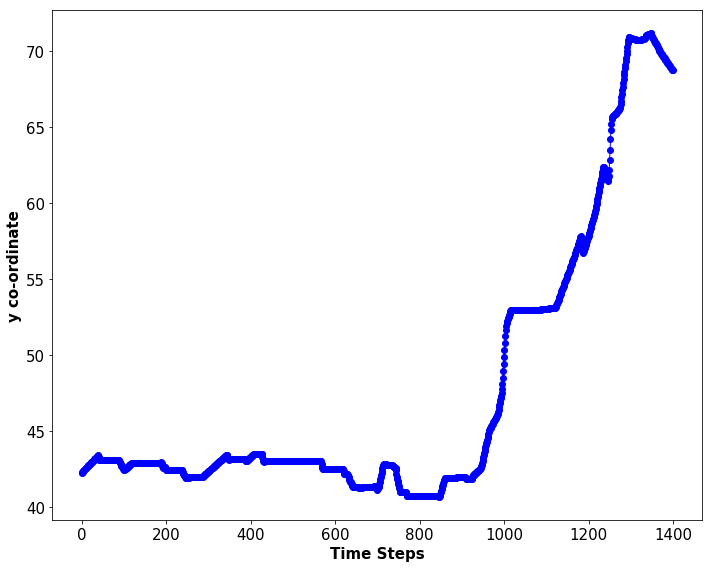

In [114]:

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = len(speed)
x = range(1400)
#plt.plot()
plt.plot(x,lane_change['x'].values[:1400],'ob-', linewidth=1.0)

#plt.yticks(np.arange(4, 7, 1.0))  

axs.set_xlabel('Time Steps', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('y co-ordinate', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 15)
axs.tick_params('x', colors='k', labelsize = 15)


fig.tight_layout()
plt.savefig('images/y_coor_singel_veh.png', bbox_inches='tight')

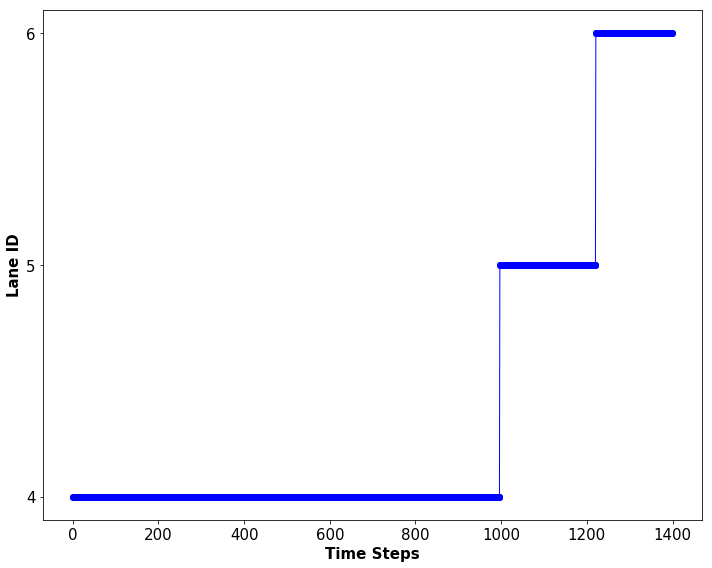

In [115]:
fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = len(speed)
x = range(1400)
#plt.plot()
plt.plot(x,lane_change['laneID'].values[:1400],'ob-', linewidth=1.0)

plt.yticks(np.arange(4, 7, 1.0))  

axs.set_xlabel('Time Steps', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Lane ID', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 15)
axs.tick_params('x', colors='k', labelsize = 15)


fig.tight_layout()
plt.savefig('images/lane_singel_veh.png', bbox_inches='tight')

In [116]:
# time step that made lane changing
tem = lane_change['laneID'].values[:1400]
i = 0
while i < len(tem) - 1:
    if tem[i] != tem[i+1]:
        print (i)
    i = i + 1

996
1220


In [117]:
# based on nbr_loc sum by row, we know whether they are in congestion or not
# visualize by lane 
# large prediction error 
# less braking vs frequent braking
# vehicle class